# 多項式近似

[matplotlib日本語対応win10ver](https://gammasoft.jp/blog/matplotlib-japanese-fonts/)

[qiita_Pythonで近似式計算](https://qiita.com/wrblue_mica34/items/0f26612207b78b68c4a1)

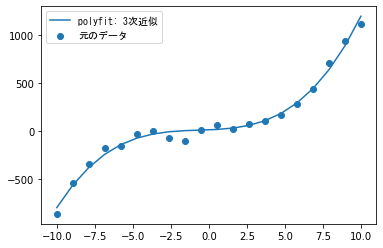

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x= np.linspace(-10,10,20)
y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50

#polyfitによる3次近似式の係数
res3=np.polyfit(x, y, 3)
#近似式の計算
y3 = np.poly1d(res3)(x) #3次

#グラフ表示
#plt.rcParams['font.family'] = 'IPAexGothic'
plt.scatter(x, y, label='元のデータ')
plt.plot(x, y3, label='polyfit: 3次近似')
plt.legend(prop={"family":"MS Gothic"})
plt.show()

In [2]:
import matplotlib
print(matplotlib.get_configdir())

C:\Users\KAZU\.matplotlib


In [3]:
res3

array([ 0.93842352,  1.86848441,  6.14546056, 14.31333328])

In [17]:
one = np.ones_like(x)
X1 = np.stack([x*x*x,x*x,x,one],1)
X1

array([[-1.00000000e+03,  1.00000000e+02, -1.00000000e+01,
         1.00000000e+00],
       [-7.16285173e+02,  8.00554017e+01, -8.94736842e+00,
         1.00000000e+00],
       [-4.92054235e+02,  6.23268698e+01, -7.89473684e+00,
         1.00000000e+00],
       [-3.20309083e+02,  4.68144044e+01, -6.84210526e+00,
         1.00000000e+00],
       [-1.94051611e+02,  3.35180055e+01, -5.78947368e+00,
         1.00000000e+00],
       [-1.06283715e+02,  2.24376731e+01, -4.73684211e+00,
         1.00000000e+00],
       [-5.00072897e+01,  1.35734072e+01, -3.68421053e+00,
         1.00000000e+00],
       [-1.82242309e+01,  6.92520776e+00, -2.63157895e+00,
         1.00000000e+00],
       [-3.93643388e+00,  2.49307479e+00, -1.57894737e+00,
         1.00000000e+00],
       [-1.45793847e-01,  2.77008310e-01, -5.26315789e-01,
         1.00000000e+00],
       [ 1.45793847e-01,  2.77008310e-01,  5.26315789e-01,
         1.00000000e+00],
       [ 3.93643388e+00,  2.49307479e+00,  1.57894737e+00,
      

## 行列演算による多項式近似

[行列演算を用いた最小二乗の解法を理解する](https://campkougaku.com/2019/10/24/math1/#toc10)
<br>[線型基底関数モデル](https://python.atelierkobato.com/kitei/)

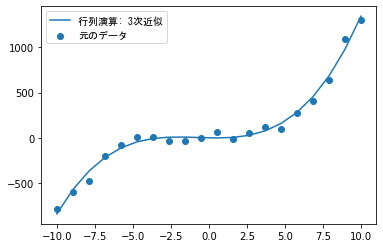

In [19]:
import numpy as np
from matplotlib import pyplot as plt

x= np.linspace(-10,10,20)
y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50

#行列演算による3次近似式の係数
one = np.ones_like(x)
X = np.stack([x*x*x,x*x,x,one],1)
invX1 = np.linalg.inv(np.dot(X.T,X))
X1tY = np.dot(X.T,y)
ans1 = np.dot(invX1,X1tY)

#近似式の計算
y_ans = np.poly1d(ans1)(x) #3次

#グラフ表示
#plt.rcParams['font.family'] = 'IPAexGothic'
plt.scatter(x, y, label='元のデータ')
plt.plot(x, y_ans, label='行列演算: 3次近似')
plt.legend(prop={"family":"MS Gothic"})
plt.show()

## polyfitと行列演算による多項式近似

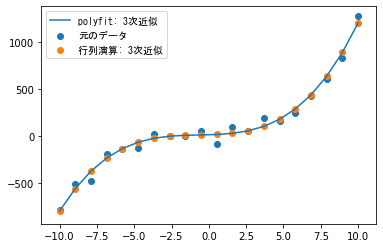

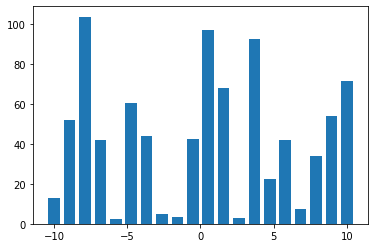

In [77]:
import numpy as np
from matplotlib import pyplot as plt

x= np.linspace(-10,10,20)
y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50

#polyfitによる3次近似式の係数
res3=np.polyfit(x, y, 3)

#行列演算による3次近似式の係数
one = np.ones_like(x)
X = np.stack([x*x*x,x*x,x,one],1)
invX1 = np.linalg.inv(np.dot(X.T,X))
X1tY = np.dot(X.T,y)
ans1 = np.dot(invX1,X1tY)

#近似式の計算
y3 = np.poly1d(res3)(x)    #3次 polyfit
y_ans = np.poly1d(ans1)(x) #3次 行列演算

#グラフ表示
plt.scatter(x, y, label='元のデータ')
plt.plot(x, y3, label='polyfit: 3次近似')
plt.scatter(x, y_ans, label='行列演算: 3次近似')
plt.legend(prop={"family":"MS Gothic"})
plt.show()

plt.bar(x,abs(y-y3))
plt.show()

## 誤差のヒストグラム

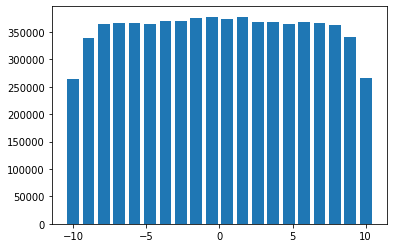

In [110]:
import numpy as np
from matplotlib import pyplot as plt

y_bar = np.zeros((1,20))
x= np.linspace(-10,10,20)

for i in range(10000):
    
    y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50

    #polyfitによる3次近似式の係数
    res3=np.polyfit(x, y, 3)

    #行列演算による3次近似式の係数
    one = np.ones_like(x)
    X = np.stack([x*x*x,x*x,x,one],1)
    invX1 = np.linalg.inv(np.dot(X.T,X))
    X1tY = np.dot(X.T,y)
    ans1 = np.dot(invX1,X1tY)

    #近似式の計算
    y3 = np.poly1d(res3)(x)    #3次 polyfit
    y_ans = np.poly1d(ans1)(x) #3次 行列演算
    
    y_bar = y_bar + abs(y-y3)

#グラフ表示
plt.bar(x,y_bar[0])
plt.show()

In [101]:
x= np.linspace(-10,10,20)
y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50

y_bar = np.zeros((1,20))

#polyfitによる3次近似式の係数
res3=np.polyfit(x, y, 3)

#近似式の計算
y3 = np.poly1d(res3)(x)    #3次 polyfit

y_bar = y_bar + abs(y-y3)

print(y_bar.shape)
print(y3.shape)

(1, 20)
(20,)


In [98]:
y_bar[0]

array([26966.83058767, 33302.52770174, 35738.98753107, 36167.86523059,
       36435.42489775, 36686.9112084 , 35588.15407612, 36858.8780515 ,
       37939.66253254, 38140.59514376, 38049.41110728, 37864.22203223,
       37535.94479981, 36810.04662913, 35717.19387678, 34653.98634799,
       37514.68799805, 35842.6584062 , 34264.10730623, 26802.58959787])